# **Image Manipulation with Numpy**



Text(0.5, 1.0, 'Original Image')

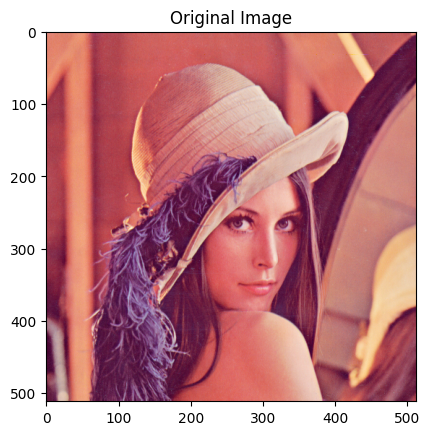

In [ ]:
#Read the image.
import cv2
import matplotlib.pyplot as plt

image_path = '/content/lena.png'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert the image from BGR to RGB we know OpenCV loads images in BGR format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title('Original Image')


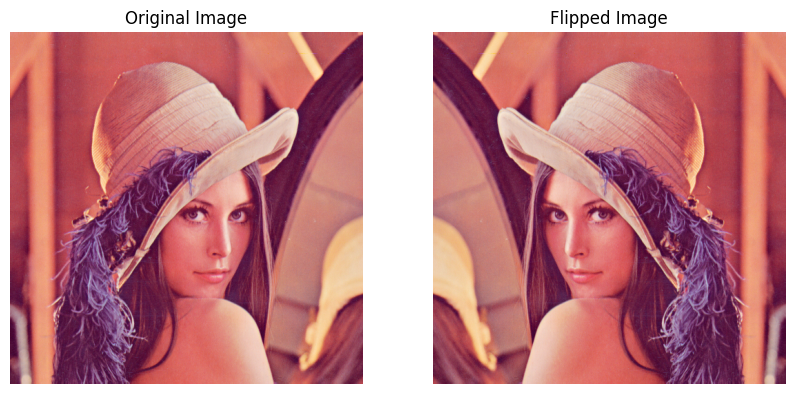

In [ ]:
# Function to flip the image from left to right
import numpy as np

def flip_image_left_to_right(image):
    flip = image[:, ::-1]
    return flip

flipped_image = flip_image_left_to_right(image_rgb)

# Display the original and flipped images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(flipped_image)
plt.title('Flipped Image')
plt.axis('off')

plt.show()


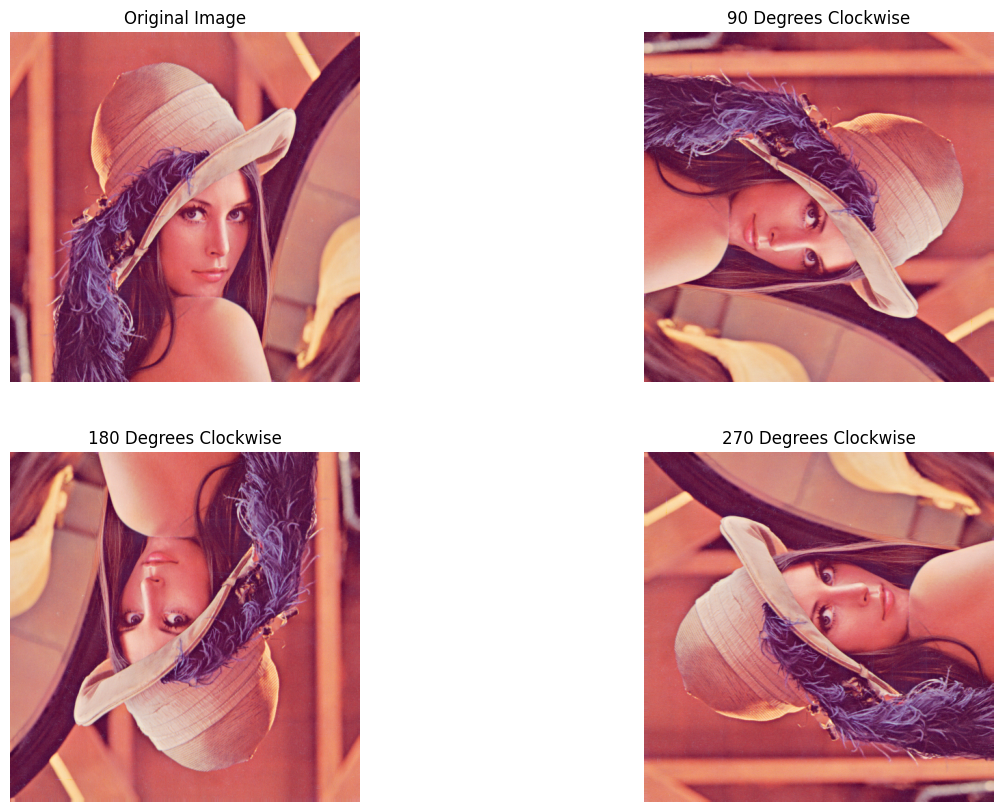

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to rotate the image 90 degrees clockwise
def rotate_image_clockwise(image):

    return np.transpose(image, (1, 0, 2))[:, ::-1]

# Rotate the image
image_90 = rotate_image_clockwise(image_rgb)
image_180 = rotate_image_clockwise(image_90)
image_270 = rotate_image_clockwise(image_180)

# Display the original and rotated images
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(image_90)
plt.title('90 Degrees Clockwise')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(image_180)
plt.title('180 Degrees Clockwise')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(image_270)
plt.title('270 Degrees Clockwise')
plt.axis('off')

plt.show()


(343, 343, 3)
(300, 400, 3)


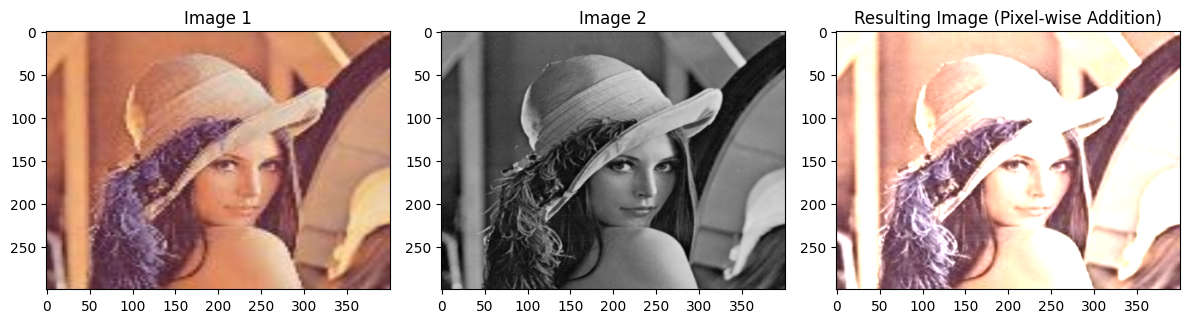

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to add two images pixel by pixel
def add_images(image1, image2):

    image1.shape == image2.shape,
    print(image2.shape)
    result_image = image1.astype(np.int32) + image2.astype(np.int32)

    # Clip the resulting values to stay within 0-255 range
    result_image = np.clip(result_image, 0, 255).astype(np.uint8)

    return result_image

# Load two example images
image1 = cv2.imread('/content/lena.jpg', cv2.IMREAD_COLOR)
image2 = cv2.imread('/content/Lena-original-gray.png',cv2.IMREAD_COLOR)
print(image2.shape)
image1 = cv2.resize(image1, (400, 300))
image2 = cv2.resize(image2, (400, 300))

result_image = add_images(image1, image2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Image 1')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Resulting Image (Pixel-wise Addition)')

plt.tight_layout()
plt.show()


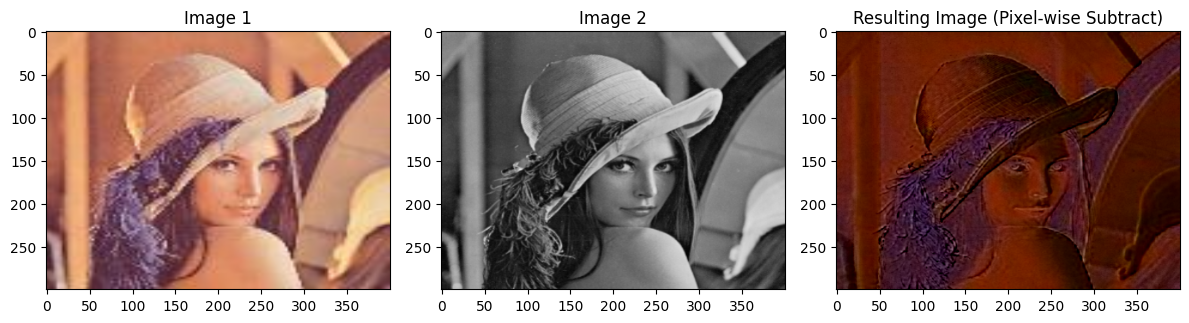

In [ ]:
import cv2
import numpy as np

def subtract_images(image1, image2):
    assert image1.shape == image2.shape, "Images must have the same dimensions"

    result_image = image1.astype(np.int32) - image2.astype(np.int32)

    # Clip the resulting values to stay within 0-255 range
    result_image = np.clip(result_image, 0, 255).astype(np.uint8)

    return result_image


# Load two example images
image1 = cv2.imread('/content/lena.jpg', cv2.IMREAD_COLOR)
image2 = cv2.imread('/content/Lena-original-gray.png',cv2.IMREAD_COLOR)

# Resize images to the same dimensions if needed
image1 = cv2.resize(image1, (400, 300))
image2 = cv2.resize(image2, (400, 300))

# Subtract images pixel by pixel
result_image = subtract_images(image1, image2)
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Image 1')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Resulting Image (Pixel-wise Subtract)')

plt.tight_layout()
plt.show()



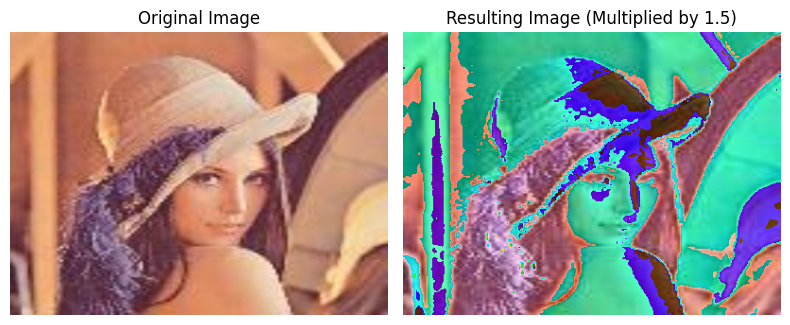

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def multiply_image_by_constant(image, constant):
    result_image = (image.astype(np.float32) * constant).astype(np.uint8)

    return result_image


image = cv2.imread('/content/lena.jpg')

image = cv2.resize(image, (400, 300))

constant = 1.5  # Example constant, adjust as needed

# Multiply image by the constant
result_image = multiply_image_by_constant(image, constant)

plt.figure(figsize=(8, 4))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Resulting Image after multiplication
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title(f'Resulting Image (Multiplied by {constant})')
plt.axis('off')

plt.tight_layout()
plt.show()


# **Problem 2: Image Operations and Vectorization**

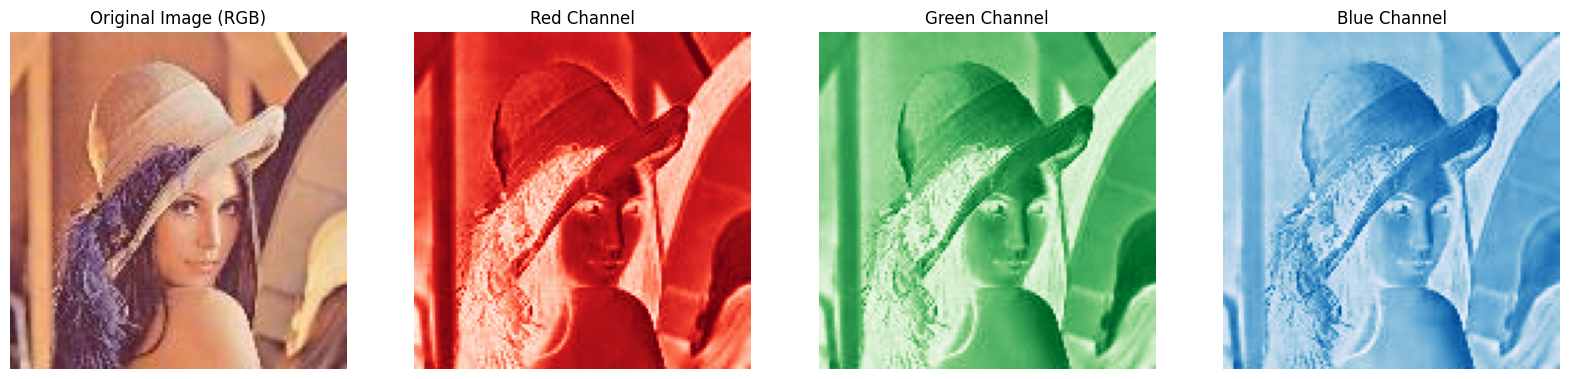

In [7]:
import cv2
import matplotlib.pyplot as plt

image_path = '/content/lena.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Extract the R, G, and B channels
R = image_rgb[:, :, 0]
G = image_rgb[:, :, 1]
B = image_rgb[:, :, 2]

# Display the original image and the extracted channels
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(image_rgb)
axes[0].set_title("Original Image (RGB)")
axes[0].axis('off')

axes[1].imshow(R, cmap='Reds')
axes[1].set_title("Red Channel")
axes[1].axis('off')

axes[2].imshow(G, cmap='Greens')
axes[2].set_title("Green Channel")
axes[2].axis('off')

axes[3].imshow(B, cmap='Blues')
axes[3].set_title("Blue Channel")
axes[3].axis('off')

plt.show()


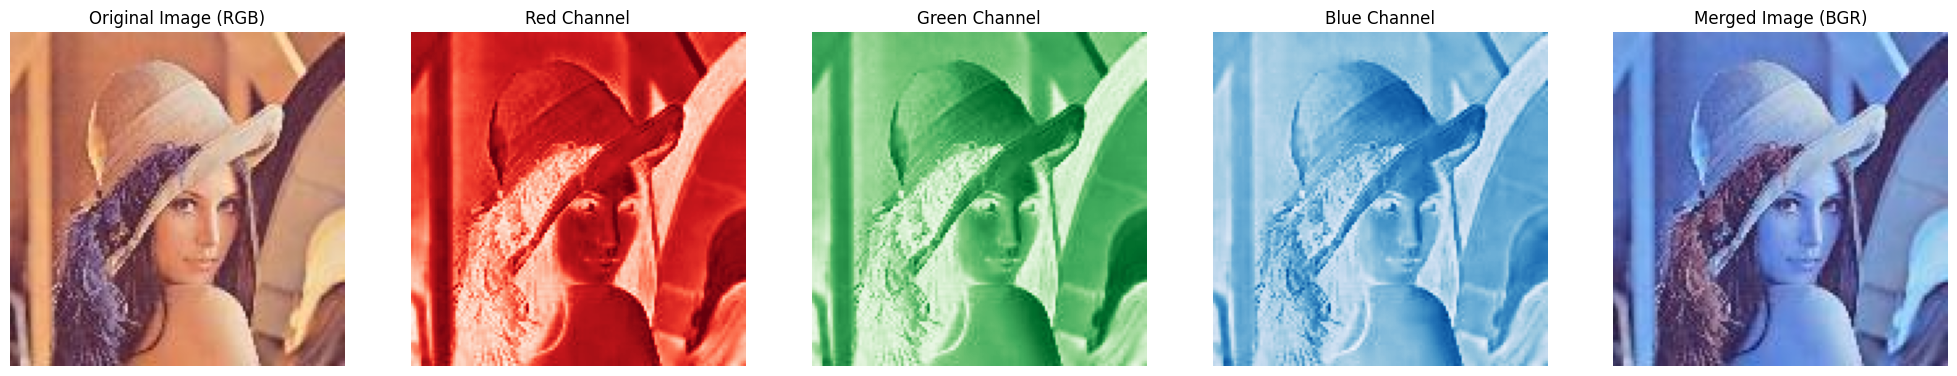

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_path = '/content/lena.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

R = image_rgb[:, :, 0]
G = image_rgb[:, :, 1]
B = image_rgb[:, :, 2]

# Merge the channels in reverse order (B, G, R) using NumPy operations
# Create an empty image with the same height and width as the original image
height, width = R.shape
image_bgr = np.zeros((height, width, 3), dtype=np.uint8)

# Assign the channels to the respective positions
image_bgr[:, :, 0] = B
image_bgr[:, :, 1] = G
image_bgr[:, :, 2] = R

fig, axes = plt.subplots(1, 5, figsize=(25, 5))
axes[0].imshow(image_rgb)
axes[0].set_title("Original Image (RGB)")
axes[0].axis('off')

axes[1].imshow(R, cmap='Reds')
axes[1].set_title("Red Channel")
axes[1].axis('off')

axes[2].imshow(G, cmap='Greens')
axes[2].set_title("Green Channel")
axes[2].axis('off')

axes[3].imshow(B, cmap='Blues')
axes[3].set_title("Blue Channel")
axes[3].axis('off')

axes[4].imshow(image_bgr)
axes[4].set_title("Merged Image (BGR)")
axes[4].axis('off')

plt.show()


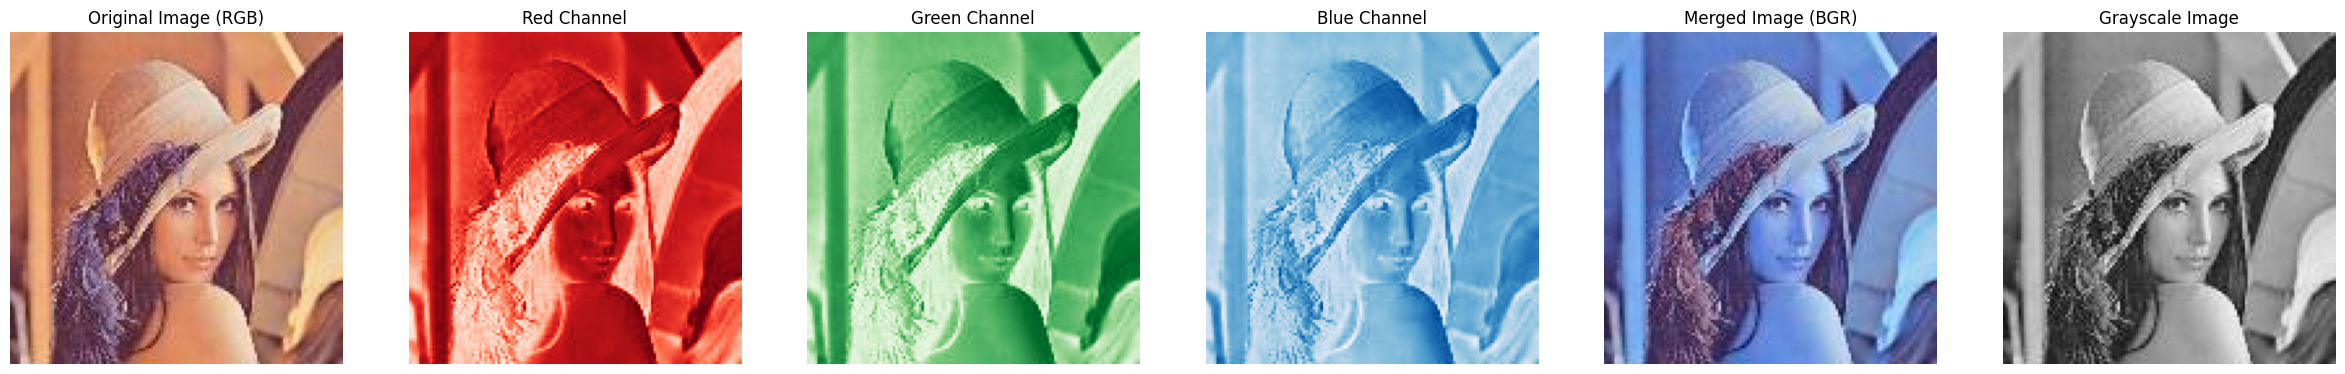

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_path = '/content/lena.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

R = image_rgb[:, :, 0]
G = image_rgb[:, :, 1]
B = image_rgb[:, :, 2]

# Merge the channels in reverse order (B, G, R) using NumPy operations
# Create an empty image with the same height and width as the original image
height, width = R.shape
image_bgr = np.zeros((height, width, 3), dtype=np.uint8)

# Assign the channels to the respective positions
image_bgr[:, :, 0] = B
image_bgr[:, :, 1] = G
image_bgr[:, :, 2] = R

# Convert the merged image to grayscale using the provided formula
gray = 0.21263903 * R + 0.71516871 * G + 0.072192319 * B

fig, axes = plt.subplots(1, 6, figsize=(30, 5))
axes[0].imshow(image_rgb)
axes[0].set_title("Original Image (RGB)")
axes[0].axis('off')

axes[1].imshow(R, cmap='Reds')
axes[1].set_title("Red Channel")
axes[1].axis('off')

axes[2].imshow(G, cmap='Greens')
axes[2].set_title("Green Channel")
axes[2].axis('off')

axes[3].imshow(B, cmap='Blues')
axes[3].set_title("Blue Channel")
axes[3].axis('off')

axes[4].imshow(image_bgr)
axes[4].set_title("Merged Image (BGR)")
axes[4].axis('off')

axes[5].imshow(gray, cmap='gray')
axes[5].set_title("Grayscale Image")
axes[5].axis('off')

plt.show()
